In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

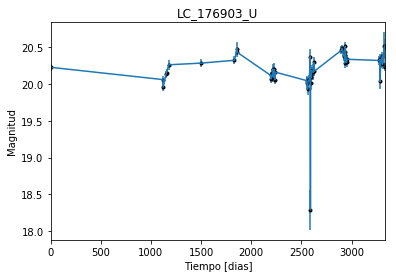

In [2]:
data = np.genfromtxt('LC_176903_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_176903_U')
plt.savefig("LC_176903_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

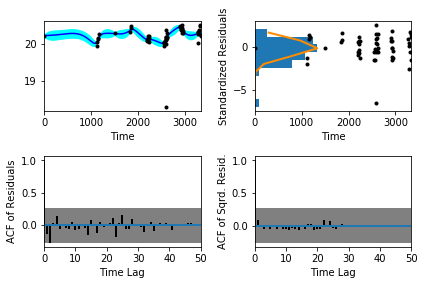

In [5]:
sample.assess_fit()

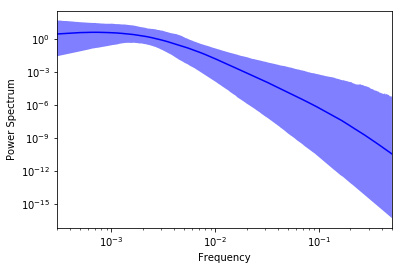

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

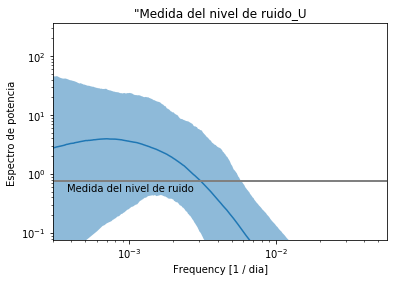

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_176903_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_176903_U')

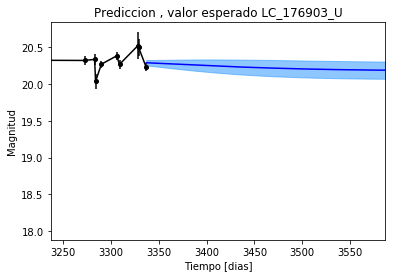

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_176903_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_176903_U')

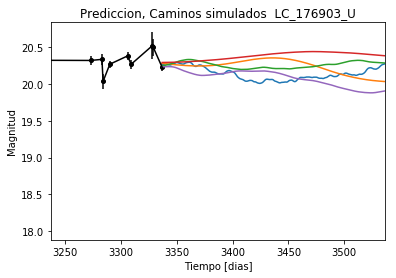

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_176903_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


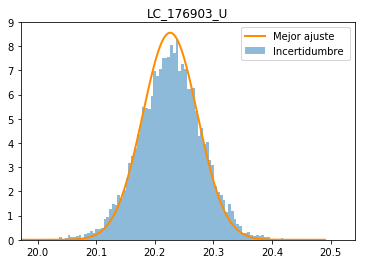

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_176903_U')
plt.savefig("Mejor_ajuste_LC_176903_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_176903_U')

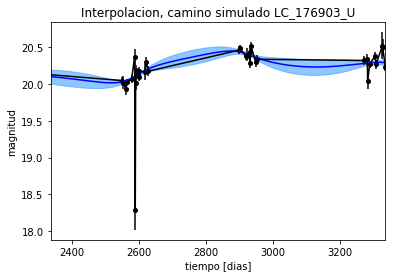

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176903_U')

Text(0.5,1,'Interpolacion, camino simulado LC_176903_U')

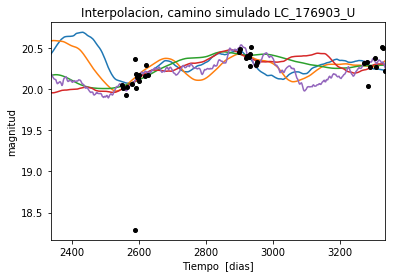

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176903_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1442.84113347
Median: 0.00395414110782
Standard deviation: 0.156261886073
68% credibility interval: [ 0.000611    0.08261901]
95% credibility interval: [  3.36373677e-04   6.27158699e-01]
99% credibility interval: [  3.06607569e-04   9.34163691e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 671.605557585
Median: 0.00120973355827
Standard deviation: 0.0621031846983
68% credibility interval: [ 0.00045746  0.01206001]
95% credibility interval: [ 0.0003201   0.16276189]
99% credibility interval: [  3.04371896e-04   4.32179825e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 424.773304111
Median: 0.0156106114756
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 826.822402036
Median: 57.3749111497
Standard deviation: 1.55465317887
68% credibility interval: [ 55.62176557  58.52942779]
95% credibility interval: [ 53.27424542  59.22876372]
99% credibility interval: [ 51.4326383   59.45899052]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 735.696992165
Median: 0.478902159157
Standard deviation: 1.84455634218
68% credibility interval: [ 0.0506127   2.90387961]
95% credibility interval: [ 0.01429765  6.28629531]
99% credibility interval: [ 0.00954699  8.50178529]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 407.876489579
Median: 0.0808115387367
Standard deviation: 7.13113940842
68% credibility interval: [  3.14327123e-03   3.17461350e+00]
95% credibility interval: [  3.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1182.72773678
Median: 4456.98327227
Standard deviation: 1.60443823917e+95
68% credibility interval: [  1.25044759e-35   4.90814892e+42]
95% credibility interval: [  1.97359244e-92   1.23561174e+70]
99% credibility interval: [  4.60848237e-97   4.87437129e+92]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 4251.00656315
Median: 20.2342436937
Standard deviation: 0.0595694076736
68% credibility interval: [ 20.1849518   20.28095733]
95% credibility interval: [ 20.1102224   20.34454926]
99% credibility interval: [ 20.01346754  20.41078459]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 783.744217272
Median: 0.00189922876453
Standard deviation: 0.201500734016
68% credibility interval: [ 0.         0.2021604]
95% credibility interval: [ 0.          0.76761677]
99% credibility interval: [ 0.          0.95846001]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 783.744217272
Median: 0.00189922876453
Standard deviation: 0.201500734016
68% credibility interval: [ 0.         0.2021604]
95% credibility interval: [ 0.          0.76761677]
99% credibility interval: [ 0.          0.95846001]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1235.52319391
Median: 0.0
Standard deviation: 0.000989264023857
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 826.822402036
Median: 57.3749111497
Standard deviation: 1.55465317887
68% credibility interval: [ 55.62176557  58.52942779]
95% credibility interval: [ 53.27424542  59.22876372]
99% credibility interval: [ 51.4326383   59.45899052]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2988.4685106
Median: 0.0217515947434
Standard deviation: 0.0290799241418
68% credibility interval: [ 0.01258571  0.0425529 ]
95% credibility interval: [ 0.00806597  0.09730577]
99% credibility interval: [ 0.00617864  0.18270873]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2629.19773749
Median: 1.59146396481
Standard deviation: 0.196850244703
68% credibility interval: [ 1.38503051  1.79296634]
95% credibility interval: [ 1.21075558  1.9549619 ]
99% credibility interval: [ 1.11037596  1.9928542 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 512.282408754
Median: 6.45578008834e-08
Standard deviation: 0.143307126282
68% credibility interval: [  2.74254060e-47   1.38399104e-03]
95% credibility interval: [  5.48127979e-75   4.06359331e-02]
99% credibility interval: [  1.44553647e-96   7.89190647e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1442.84113347
Median: (-0.0248446013112+0j)
Standard deviation: 1.60215462992
68% credibility interval: [-0.51911055-0.86158652j -0.00383905-0.00551779j]
95% credibility interval: [ -3.94055432e+00+0.j          -2.11349814e-03-0.02654796j]
99% credibility interval: [ -5.86952358e+00-4.06706031j  -1.92647217e-03-0.0109079j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 671.605557585
Median: (-0.0076009801189+0.00625302386673j)
Standard deviation: 1.32483389123
68% credibility interval: [-0.07577526+1.51557689j -0.00287431+0.00554672j]
95% credibility interval: [-1.02266314 +5.60978230e+00j -0.00201126 +3.23325100e-03j]
99% credibility interval: [ -2.71546593e+00+6.0055366j   -1.91242502e-03+0.01865458j]
Posterior sum